### 7. CNN 패션 아이템(fashion-MNIST)을 분류 프로그램

In [1]:
from tensorflow.keras import datasets
import tensorflow as tf 
import matplotlib.pyplot as plt 

from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 데이터셋 로드하기 
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images.shape  # 60000개의 샘플 각각 28*28 크기 


# 전처리 : 0~1 사이로 변환 
train_images = train_images/255.0
test_images = test_images/255.0

In [2]:
print(train_images.shape )
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop, Adam


model = tf.keras.models.Sequential([
    Conv2D(64, kernel_size=(3, 3), padding='Same',
                 activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(),
    Dropout(0.25),
    
    BatchNormalization(),
    Conv2D(64, kernel_size=(3, 3), padding='Same',
                 activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    
    Flatten(),
    Dense(10, activation="softmax")  # output
])


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0

In [5]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 75s 39ms/step - loss: 0.4225 - accuracy: 0.8492 - val_loss: 0.3127 - val_accuracy: 0.8908
Epoch 2/20
1875/1875 [==============================] - 79s 42ms/step - loss: 0.3076 - accuracy: 0.8889 - val_loss: 0.3196 - val_accuracy: 0.8839
Epoch 3/20
1875/1875 [==============================] - 75s 40ms/step - loss: 0.2820 - accuracy: 0.8977 - val_loss: 0.3108 - val_accuracy: 0.8850
Epoch 4/20
1875/1875 [==============================] - 68s 36ms/step - loss: 0.2663 - accuracy: 0.9044 - val_loss: 0.2648 - val_accuracy: 0.9052
Epoch 5/20
1875/1875 [==============================] - 71s 38ms/step - loss: 0.2526 - accuracy: 0.9078 - val_loss: 0.2905 - val_accuracy: 0.8940
Epoch 6/20
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2450 - accuracy: 0.9111 - val_loss: 0.2747 - val_accuracy: 0.9025
Epoch 7/20
1875/1875 [==============================] - 74s 39ms/step - loss: 0.2358 - accuracy: 0.9137 - val_loss: 0.2598 -

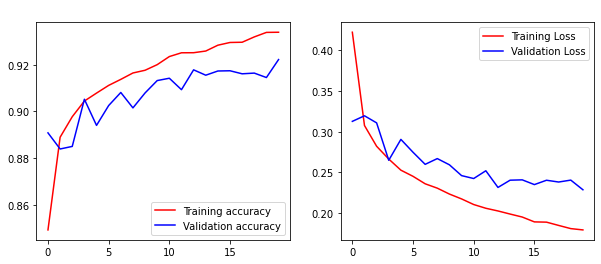

In [6]:
# 학습 과정 시각화 
def plot_history():    
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], 'r', label='Training accuracy')
    plt.plot(history.history['val_accuracy'], 'b', label = 'Validation accuracy')
    plt.title('accuracy plot', color='white')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], 'r', label = 'Training Loss')
    plt.plot(history.history['val_loss'], 'b', label = 'Validation Loss')
    plt.title('loss plot', color='white')
    plt.legend()

plot_history()
